<h3>Exploring the NZV, Normalization, Outlier Removal</h3>

In [7]:
# importing dataset and libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import normalize
from sklearn.feature_selection import VarianceThreshold

diabetes = pd.read_csv ("diabetes.csv")

In [8]:
print(diabetes.shape)
print(diabetes.describe(include='all'))

(70692, 22)
       Diabetes_binary        HighBP      HighChol     CholCheck  \
count     70692.000000  70692.000000  70692.000000  70692.000000   
mean          0.500000      0.563458      0.525703      0.975259   
std           0.500004      0.495960      0.499342      0.155336   
min           0.000000      0.000000      0.000000      0.000000   
25%           0.000000      0.000000      0.000000      1.000000   
50%           0.500000      1.000000      1.000000      1.000000   
75%           1.000000      1.000000      1.000000      1.000000   
max           1.000000      1.000000      1.000000      1.000000   

                BMI        Smoker        Stroke  HeartDiseaseorAttack  \
count  70692.000000  70692.000000  70692.000000          70692.000000   
mean      29.856985      0.475273      0.062171              0.147810   
std        7.113954      0.499392      0.241468              0.354914   
min       12.000000      0.000000      0.000000              0.000000   
25%       

In [9]:
# Near-zero variance

tr= VarianceThreshold(threshold=0.1)

tr.fit(diabetes) # applying threshold

feature_nzv=tr.get_support(indices=True) #getting indices with no nzv features
data_nzv=diabetes.columns[feature_nzv] # getting column names.
data_p_nzv=diabetes[data_nzv] # filtered data.

data_p_nzv.shape



(70692, 17)

In [10]:
# what variables have been dropped.
diabetes.columns.drop(data_nzv)

Index(['CholCheck', 'Stroke', 'HvyAlcoholConsump', 'AnyHealthcare',
       'NoDocbcCost'],
      dtype='object')

Removed variables:
- CholCheck
- Stroke
- HvyAlcholConsump
- AnyHealthcare
- NoDocbcCost

the dataset after the removel is data_p_nzv referring to data past nzv.

<h3>Removing outliers for BMI, PhysHlth and MentHlth</h3>

<Axes: >

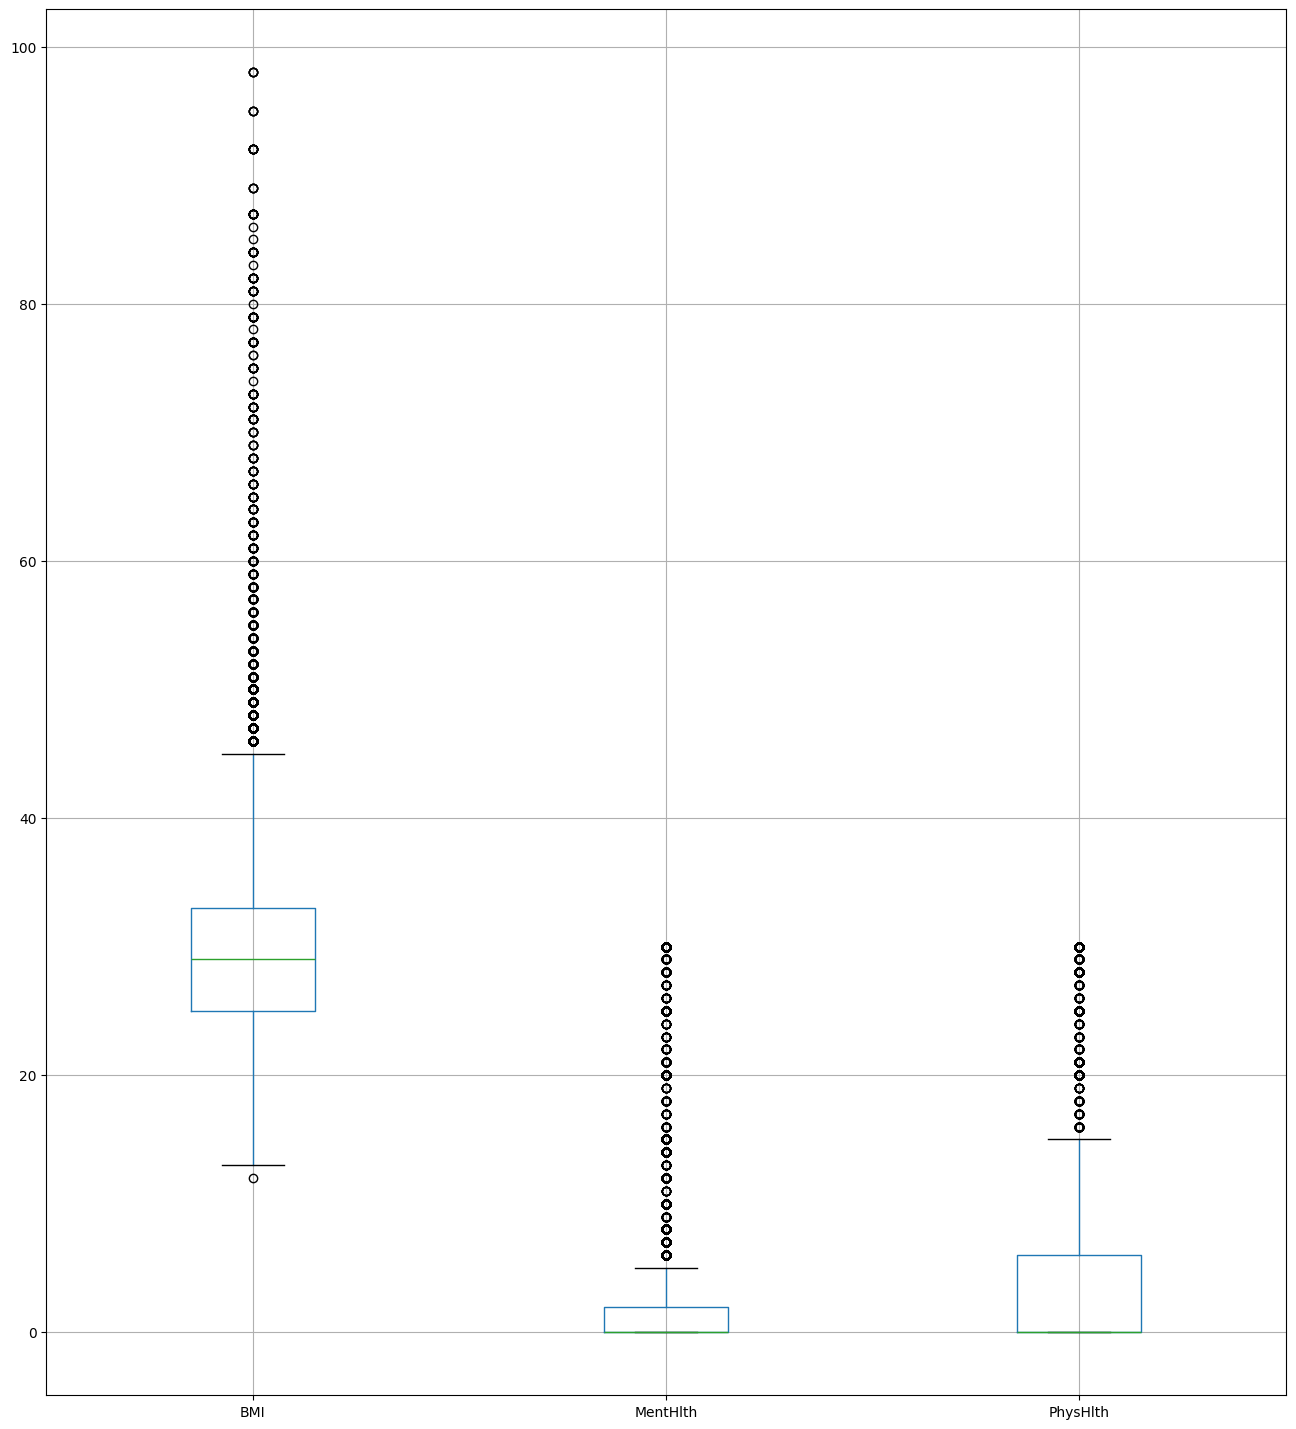

In [11]:
plt.figure(figsize=(16, 18))
diabetes[['BMI','MentHlth','PhysHlth']].boxplot()

In [14]:
# Defining variables
bmi_col = diabetes['BMI'].copy()
ph_col = diabetes['PhysHlth'].copy()
mh_col = diabetes['MentHlth'].copy()

<Axes: >

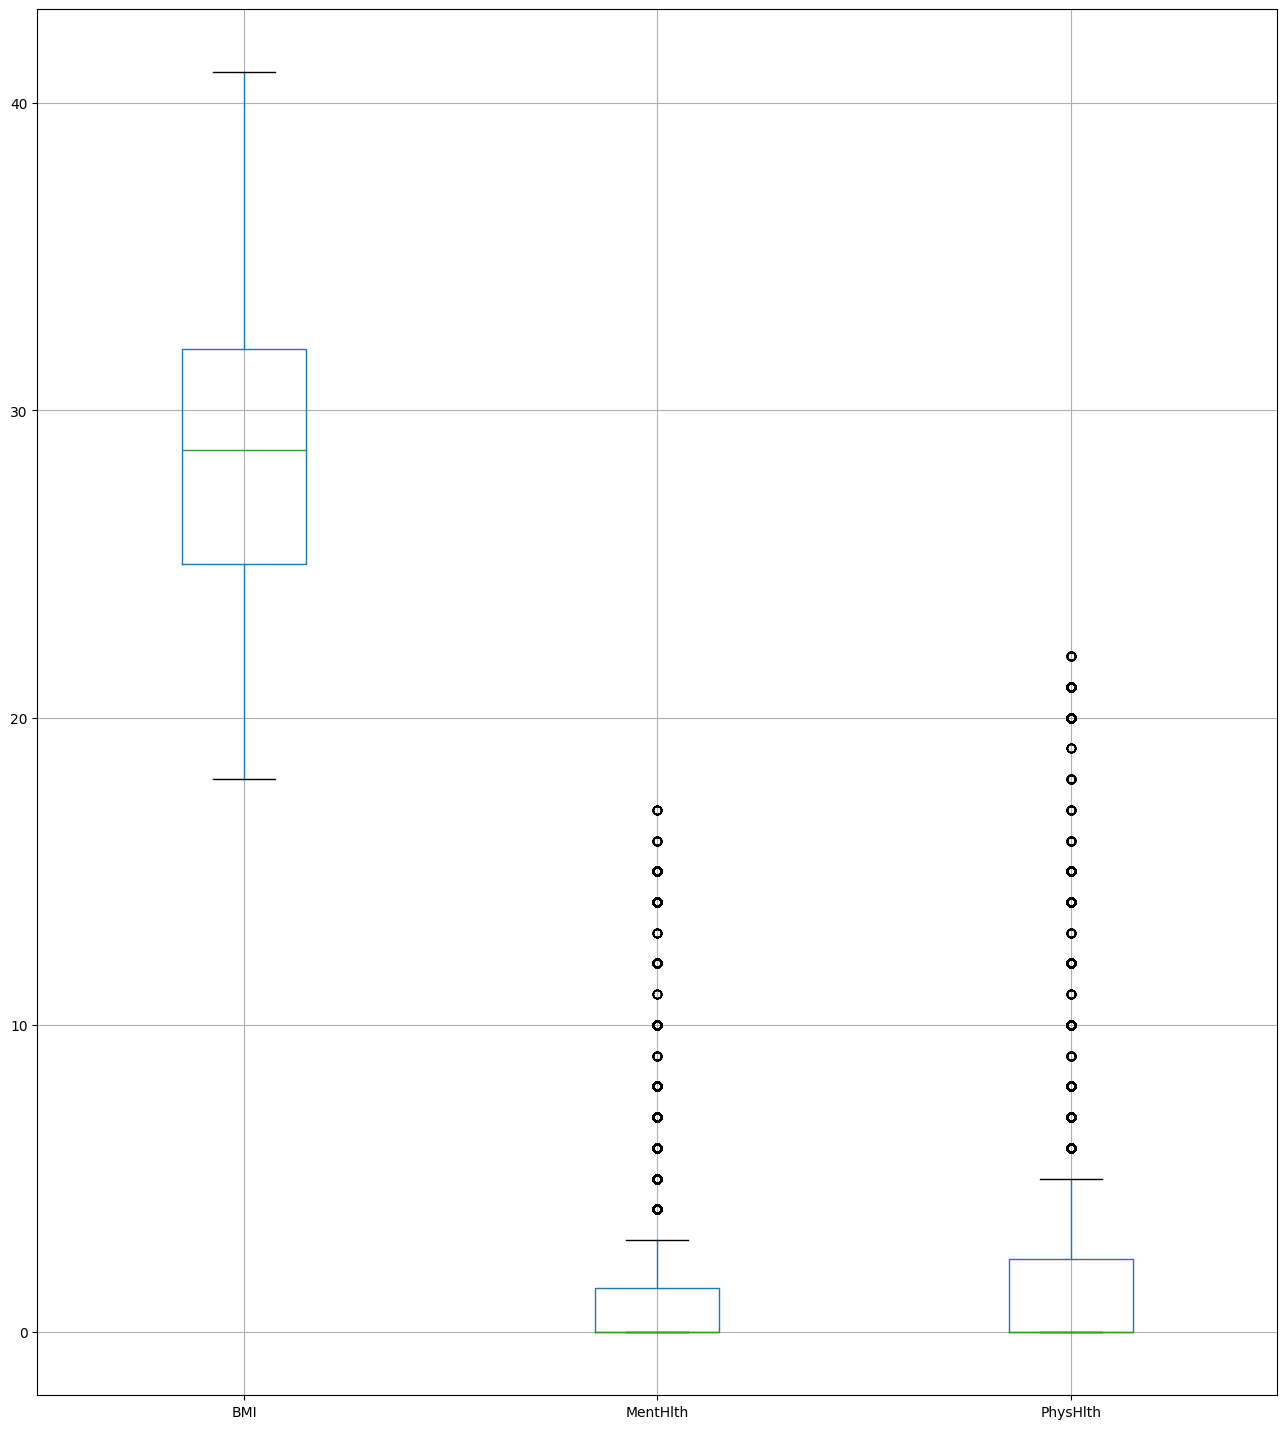

In [15]:
# Obtaining outlier tresholds.
mean_bmi=np.mean(bmi_col)
std_bmi=np.std(bmi_col)
tr_bmi=1.7*std_bmi

mean_ph= np.mean(ph_col)
std_ph=np.std(ph_col)
tr_ph= 1.7*std_ph

mean_mh= np.mean(mh_col)
std_mh=np.std(mh_col)
tr_mh= 1.7*std_mh

# Identifying outliers

data_p_ol=diabetes.copy()
data_p_ol.loc[:,'BMI'] = bmi_col[np.abs(bmi_col - mean_bmi) <= tr_bmi]
data_p_ol.loc[:,'PhysHlth'] = ph_col[np.abs(ph_col - mean_ph) <= tr_ph]
data_p_ol.loc[:,'MentHlth'] = mh_col[np.abs(mh_col - mean_mh) <= tr_mh]



# Filling any introduced NaN values
mean_bmi_u=np.nanmean(data_p_ol['BMI'])
mean_ph_u=np.nanmean(data_p_ol['PhysHlth'])
mean_mh_u=np.nanmean(data_p_ol['MentHlth'])

data_p_ol['BMI'].fillna(mean_bmi_u, inplace=True)
data_p_ol['PhysHlth'].fillna(mean_ph_u, inplace=True)
data_p_ol['MentHlth'].fillna(mean_mh_u, inplace=True)

# Checking variables after outlier removal

plt.figure(figsize=(16, 18))
data_p_ol[['BMI','MentHlth','PhysHlth']].boxplot()


BMI Outliers have been fixed, but MentHlth and PhysHlth outliers left will stay, otherwise, the variables do not seem to have almost any variance.

The data with fixed outliers is saved in data_p_ol referring to data past outliers.

<h3> Normalizing BMI Variable </h3>

In [16]:
# Normalizing BMI variable without outlier fix

bmi_c=data_p_nzv['BMI']
norm_bmi= normalize(bmi_c.values.reshape(1,-1)) # column into 2D array. -1 calculates the number of columns based on the original array.

# Changing BMI column into normalized values

data_p_nzv.loc[:,'BMI']= norm_bmi[0] # replace with first row of 2D array.

# Normalizing BMI variable with outlier fix

bmi_c_ol=data_p_ol['BMI']
norm_bmi_ol= normalize(bmi_c_ol.values.reshape(1,-1)) 

# changing BMI column into normalized values

data_p_ol.loc[:,'BMI']= norm_bmi_ol[0] # replace with first row of 2D array.


<h3> Correlation Assesment </h3>

From EDA the correlation of variables which could be removed to reduce redundancy were:

- GenHealth & PhysHlth 0.55
- GenHealth & DiffWalking 0.48
- DiffWalk & PhysHlth 0.38

Below the effects of removing GenHlth or PhysHlth and DiffWalk are assesed.


<Axes: title={'center': 'Data Without NZV, PhysHlth, DiffWalk'}>

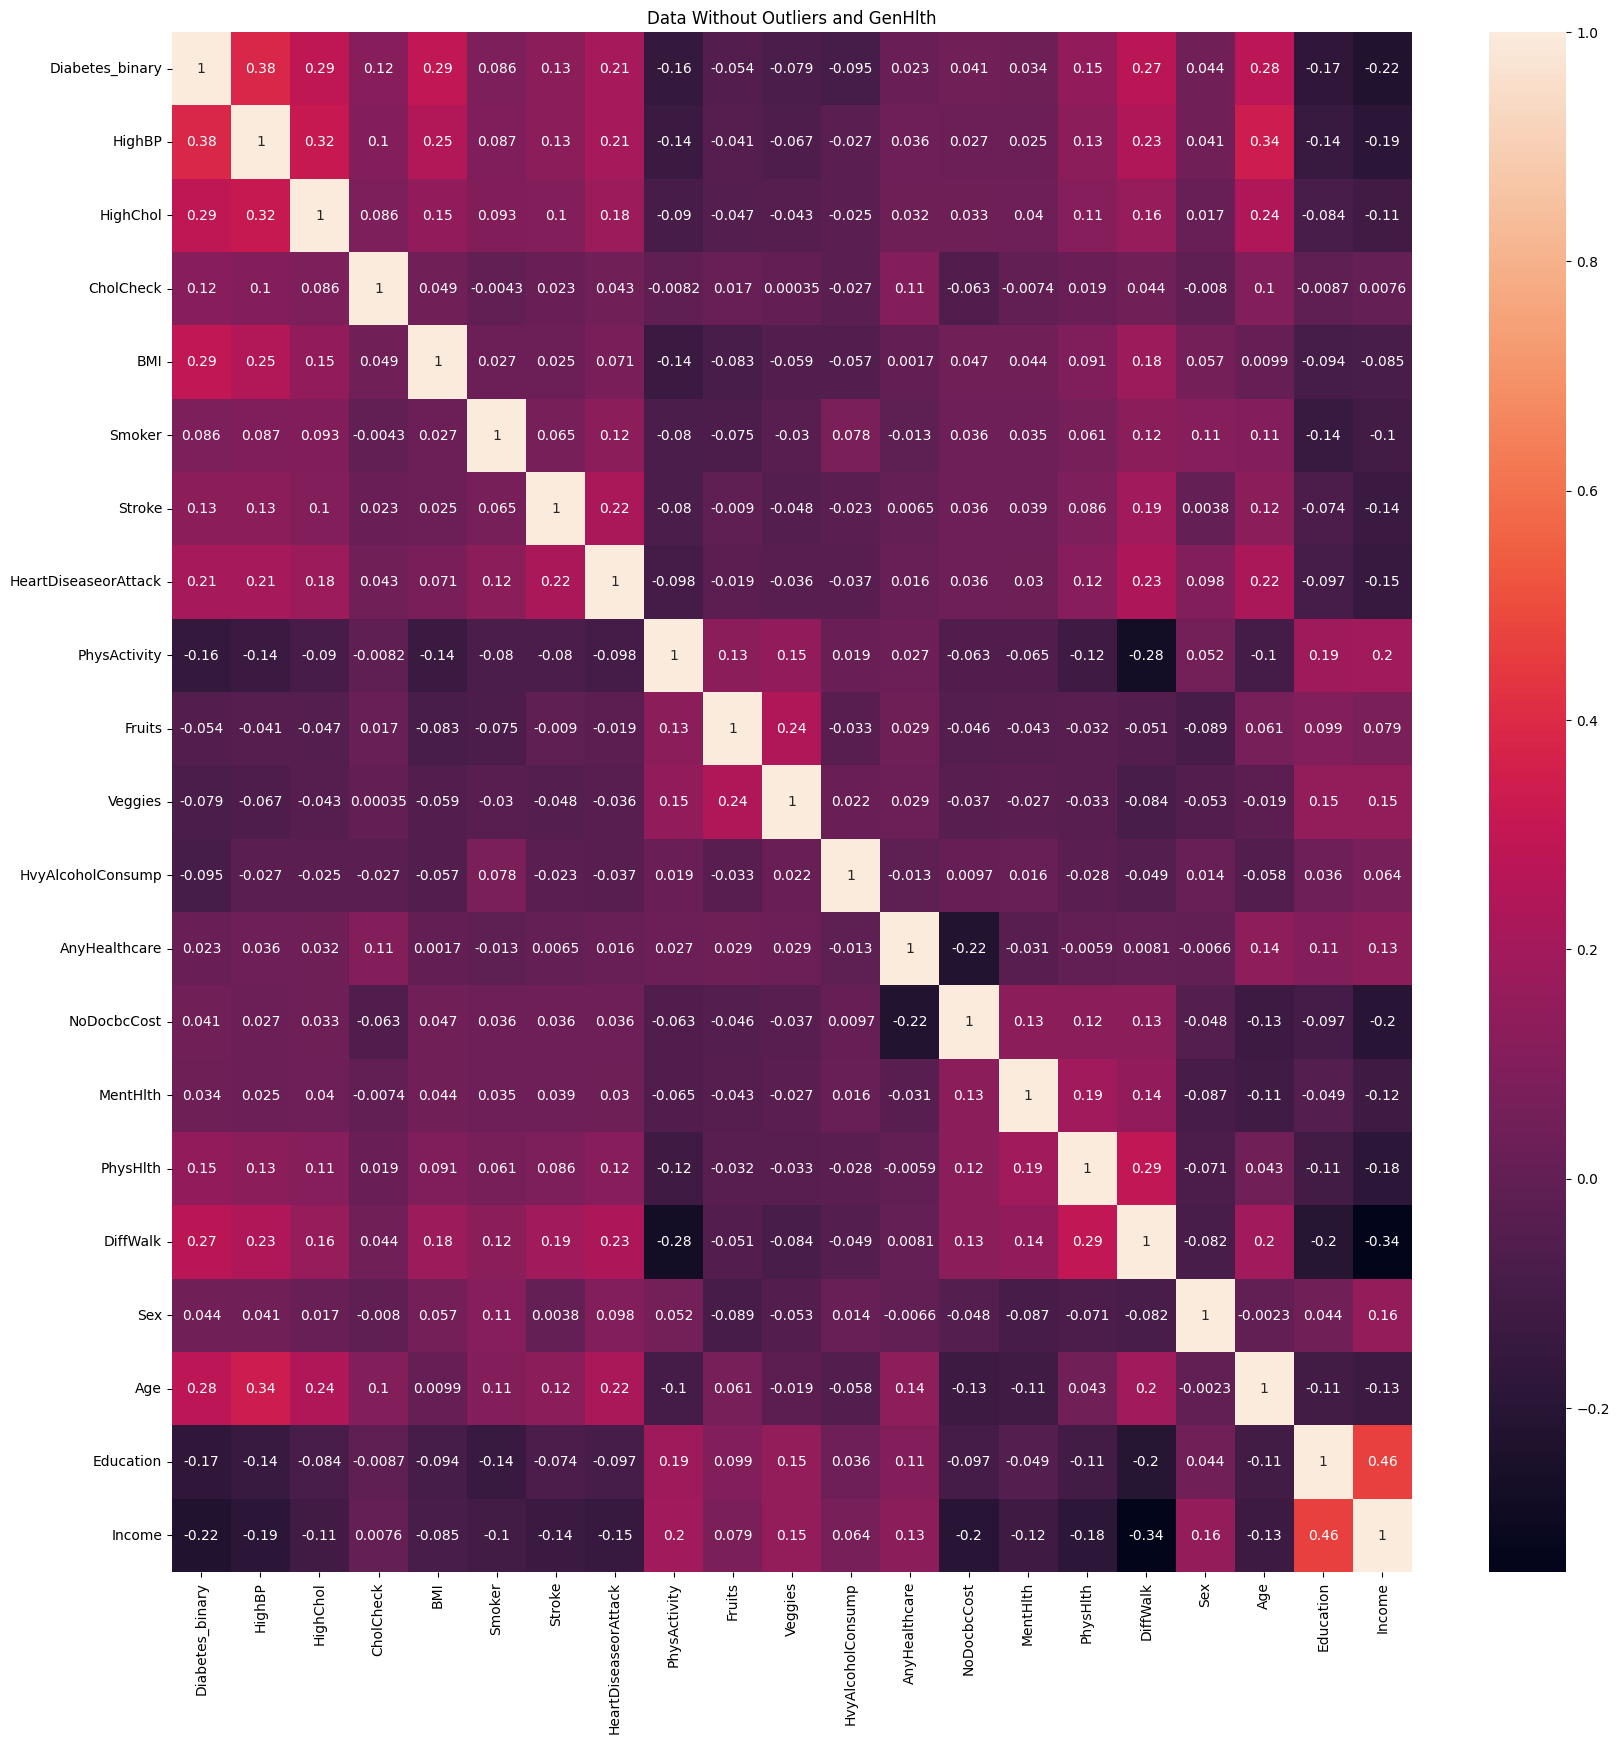

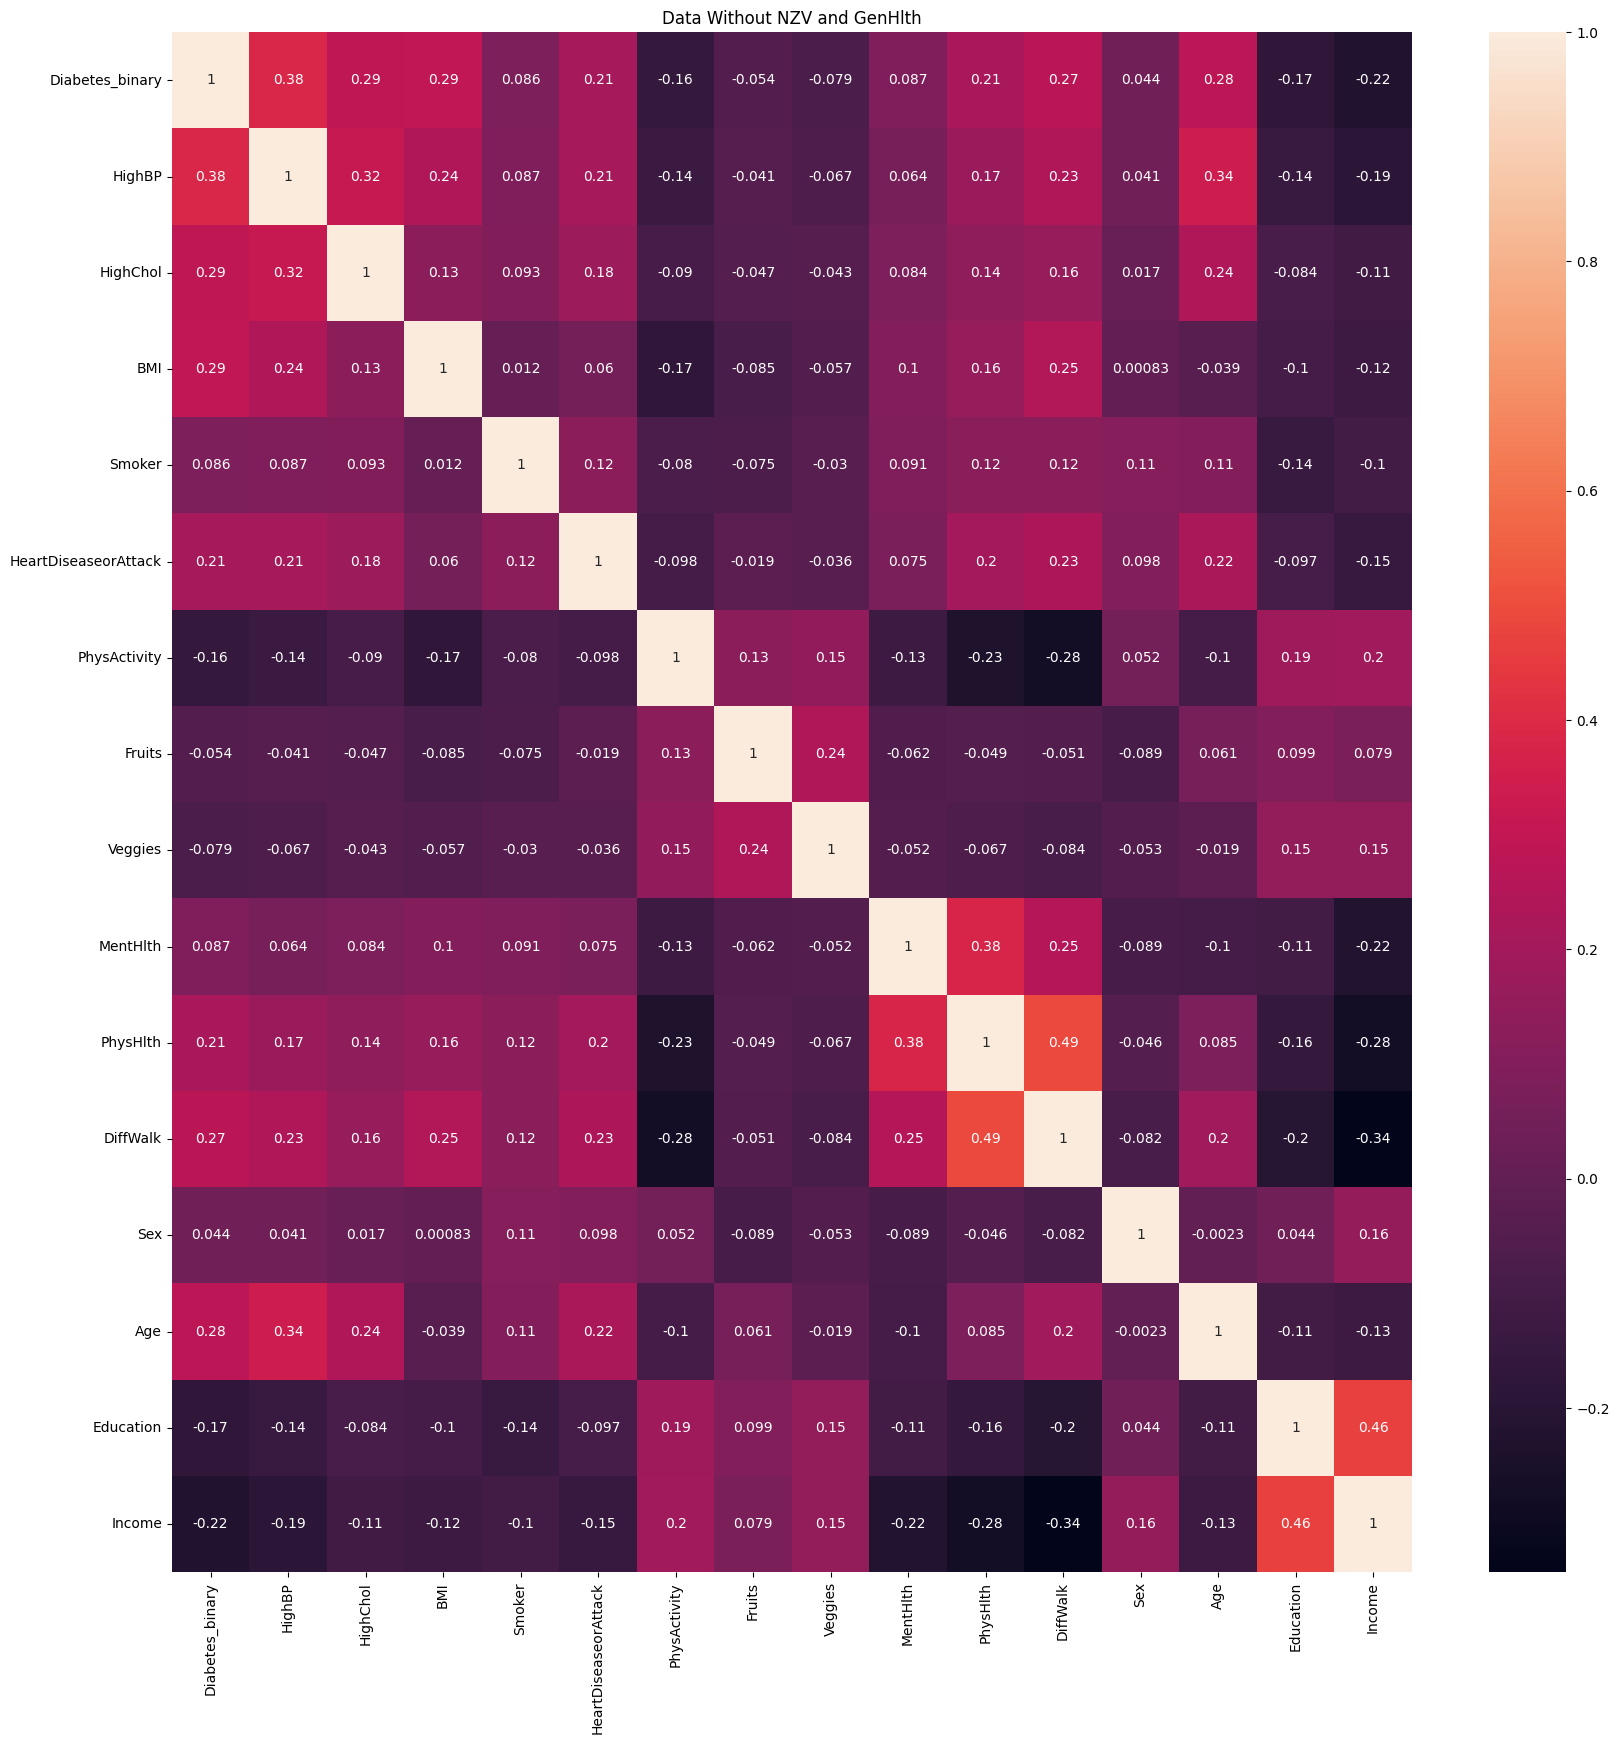

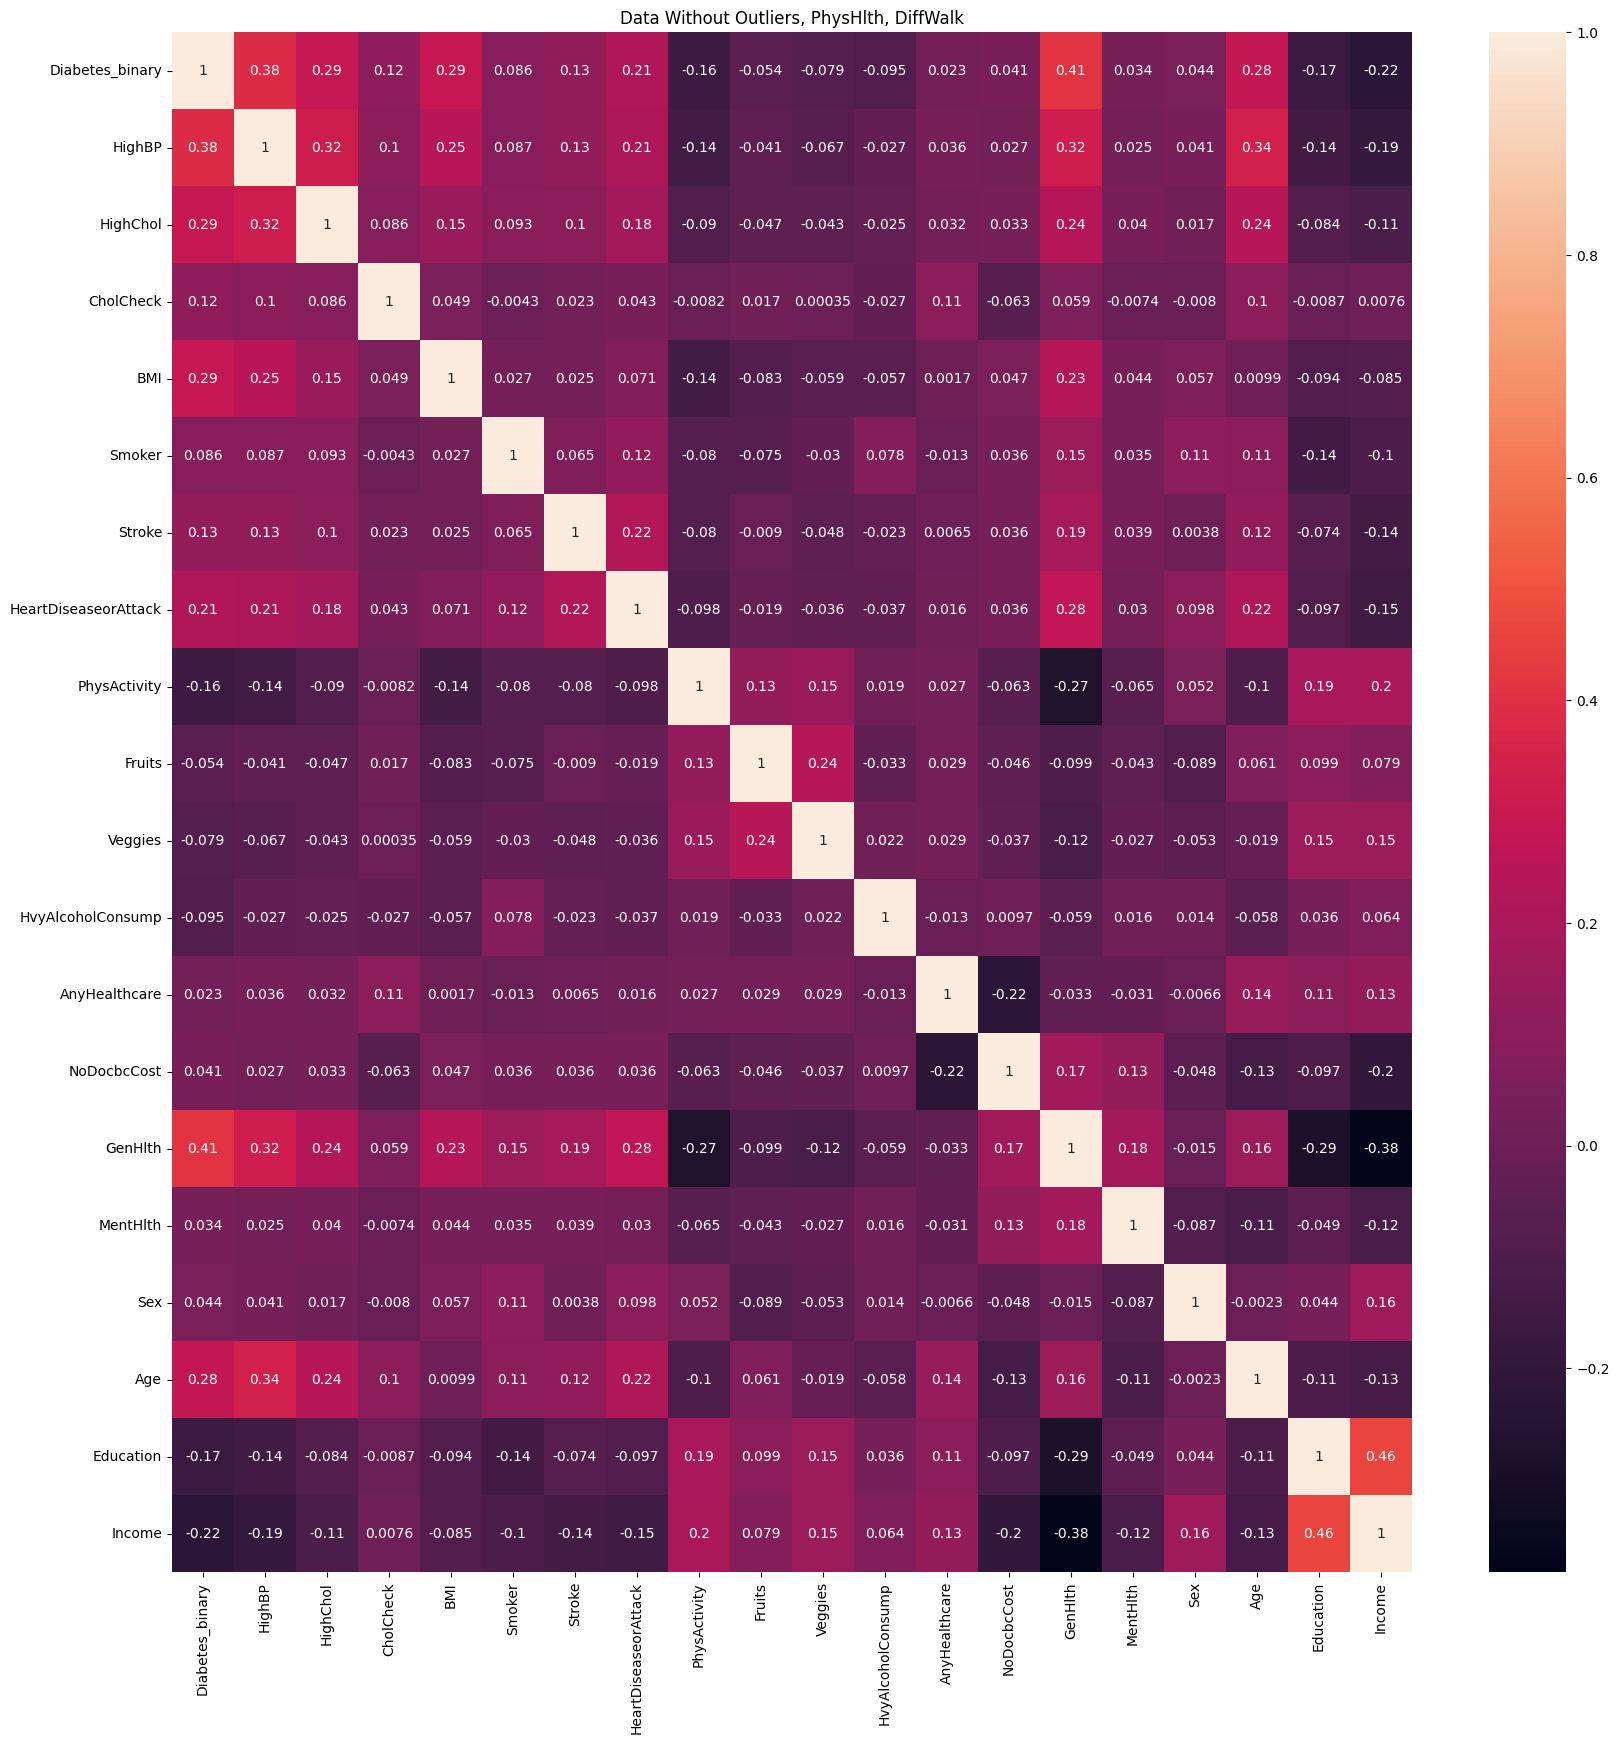

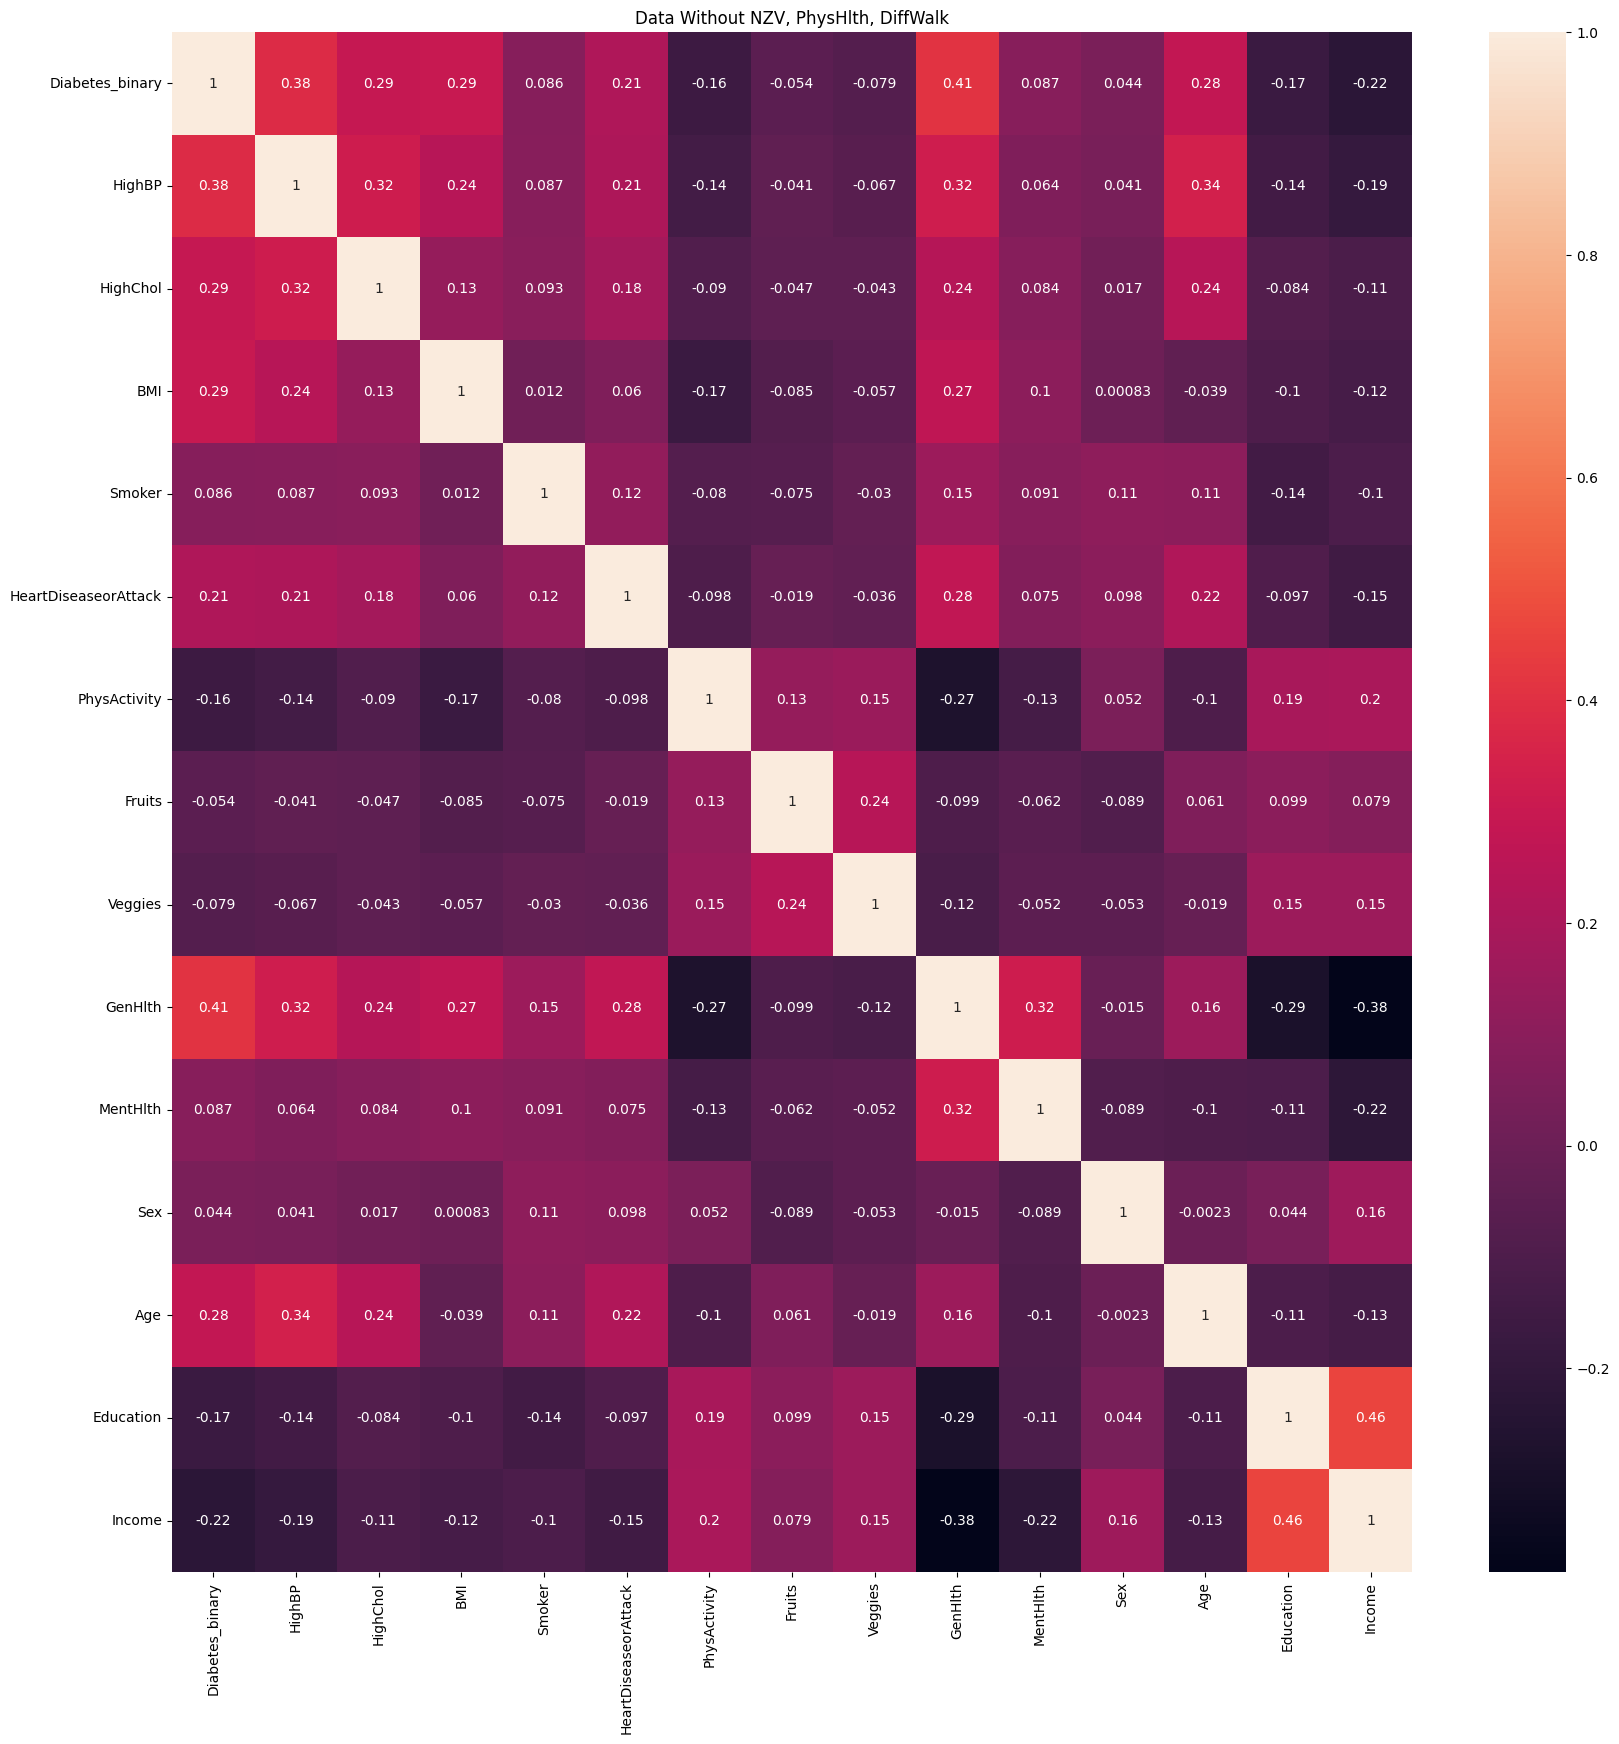

In [17]:
# creating dataset without outliers and without GenHlth feature.
data_p_ol_genhlth = data_p_ol.copy()
data_p_ol_genhlth = data_p_ol_genhlth.drop(columns=['GenHlth'])

plt.figure(figsize=(20,20))
plt.title("Data Without Outliers and GenHlth")
sns.heatmap(data_p_ol_genhlth.corr(), annot=True)

# creating dataset without nzv and GenHlth Feature
data_p_nzv_genhlth = data_p_nzv.copy()
data_p_nzv_genhlth =data_p_nzv_genhlth.drop(columns=['GenHlth'])

plt.figure(figsize=(20,20))
plt.title("Data Without NZV and GenHlth")
sns.heatmap(data_p_nzv_genhlth.corr(), annot=True)

# creating dataset without outliers and without PhysHlth or DiffWalk features.
data_min_diffwalk_phys_ol = data_p_ol.copy()
data_min_diffwalk_phys_ol = data_min_diffwalk_phys_ol.drop(columns=['PhysHlth','DiffWalk'])

plt.figure(figsize=(20,20))
plt.title("Data Without Outliers, PhysHlth, DiffWalk")
sns.heatmap(data_min_diffwalk_phys_ol.corr(), annot=True)

# creating dataset without nzv and PhysHlth or DiffWalk features.
data_min_diffwalk_phys_nzv = data_p_nzv.copy()
data_min_diffwalk_phys_nzv =data_min_diffwalk_phys_nzv.drop(columns=['PhysHlth','DiffWalk'])

plt.figure(figsize=(20,20))
plt.title("Data Without NZV, PhysHlth, DiffWalk")
sns.heatmap(data_min_diffwalk_phys_nzv.corr(), annot=True)

The datasets collected from the above and the feature engineering applied are as follows:

- data_p_nzv: nzv feature removal, normalization.
- data_p_ol: normalization, outlier removal.
- data_p_ol_genhlth: normalization, outlier removal, genhlth variable removal.
- data_p_nzv_genhlth: nzv feature removal, normalization, genhlth variable removal.
- data_min_diffwalk_phys_nzv: nzv feature removal, normalization, physhlth and diffvalk variables removed.
- data_min_diffwalk_phys_ol: normalization, outlier removal, physhlth and diffvalk variables removed.

<h3>Testing different dataset performance</h3>

Seven datasets are present, including the original diabetes set. They will all be split and tested for performance on basic decision trees.

In [18]:
# importing libraries

from sklearn import tree # trees modelling
from sklearn.model_selection import train_test_split # data splitting

In [19]:
# splitting data

# first dataset: original

Ivs1 = diabetes.drop('Diabetes_binary', axis='columns')
DV1 = diabetes['Diabetes_binary']

train_Ivs1, test_Ivs1, train_DV1, test_DV1 = train_test_split(Ivs1,DV1,test_size=0.3,random_state=51)

# second dataset: nzv
Ivs2 = data_p_nzv.drop('Diabetes_binary', axis='columns')
DV2 = data_p_nzv['Diabetes_binary']

train_Ivs2, test_Ivs2, train_DV2, test_DV2 = train_test_split(Ivs2,DV2,test_size=0.3,random_state=51)

# third dataset: outliers
Ivs3 = data_p_ol.drop('Diabetes_binary', axis='columns')
DV3 = data_p_ol['Diabetes_binary']

train_Ivs3, test_Ivs3, train_DV3, test_DV3 = train_test_split(Ivs3,DV3,test_size=0.3,random_state=51)

# fourth dataset: nzv and genhlth
Ivs4 = data_p_nzv_genhlth.drop('Diabetes_binary', axis='columns')
DV4 = data_p_nzv_genhlth['Diabetes_binary']

train_Ivs4, test_Ivs4, train_DV4, test_DV4 = train_test_split(Ivs4,DV4,test_size=0.3,random_state=51)

# fifth dataset: outliers and genhlth
Ivs5 = data_p_ol_genhlth.drop('Diabetes_binary', axis='columns')
DV5 = data_p_ol_genhlth['Diabetes_binary']

train_Ivs5, test_Ivs5, train_DV5, test_DV5 = train_test_split(Ivs5,DV5,test_size=0.3,random_state=51)

# sixth dataset: nzv, physhlth and diffwalk
Ivs6 = data_min_diffwalk_phys_nzv.drop('Diabetes_binary', axis='columns')
DV6 = data_min_diffwalk_phys_nzv['Diabetes_binary']

train_Ivs6, test_Ivs6, train_DV6, test_DV6 = train_test_split(Ivs6,DV6,test_size=0.3,random_state=51)

# seventh dataset: outliers, physhlth and diffwalk
Ivs7 = data_min_diffwalk_phys_ol.drop('Diabetes_binary', axis='columns')
DV7 = data_min_diffwalk_phys_ol['Diabetes_binary']

train_Ivs7, test_Ivs7, train_DV7, test_DV7 = train_test_split(Ivs7,DV7,test_size=0.3,random_state=51)

In [155]:
# setting up initial models

model1 = tree.DecisionTreeClassifier()
fitoriginal=model1.fit(train_Ivs1, train_DV1)

model2 = tree.DecisionTreeClassifier()
fitnzv=model2.fit(train_Ivs2, train_DV2)

model3 = tree.DecisionTreeClassifier()
fitol=model3.fit(train_Ivs3, train_DV3)

model4 = tree.DecisionTreeClassifier()
fitnzvgenhlth=model4.fit(train_Ivs4, train_DV4)

model5 = tree.DecisionTreeClassifier()
fitolgenhlth=model5.fit(train_Ivs5, train_DV5)

model6 = tree.DecisionTreeClassifier()
fitnzvphdiff=model6.fit(train_Ivs6, train_DV6)

model7 = tree.DecisionTreeClassifier()
fitolphdiff=model7.fit(train_Ivs7, train_DV7)


In [156]:
# evaluating performance scores
acc1=model1.score(test_Ivs1,test_DV1)
acc2=model2.score(test_Ivs2,test_DV2)
acc3=model3.score(test_Ivs3,test_DV3)
acc4=model4.score(test_Ivs4,test_DV4)
acc5=model5.score(test_Ivs5,test_DV5)
acc6=model6.score(test_Ivs6,test_DV6)
acc7=model7.score(test_Ivs7,test_DV7)

print('model1:{}'.format(round(acc1,3)))
print('model2:{}'.format(round(acc2,3)))
print('model3:{}'.format(round(acc3,3)))
print('model4:{}'.format(round(acc4,3)))
print('model5:{}'.format(round(acc5,3)))
print('model6:{}'.format(round(acc6,3)))
print('model7:{}'.format(round(acc7,3)))

model1:0.654
model2:0.657
model3:0.658
model4:0.639
model5:0.641
model6:0.654
model7:0.654


The datasets performed in a similar fashion. The original dataset seems to perform in the top category with ~66% accuracy. The deletion of features does not provide any assistance in modelling and outlier removal makes only a very small difference.

Four ways of investigating important features will be:

- using decision trees to see which features are deemed important.
- using correlation obtained in EDA.
- using previous research and medical journals.

In [157]:
#setting up initial model

model1 = tree.DecisionTreeClassifier()
classtree_noprune=model1.fit(train_Ivs1, train_DV1)

In [158]:
optalpha = classtree_noprune.cost_complexity_pruning_path(train_Ivs1,train_DV1) #finding optimal pruning parameter alpha.
biggest=max(optalpha.ccp_alphas) # extracting highest alpha
medianalpha=np.median(optalpha.ccp_alphas) # extracting median alpha.
meanalpha=np.mean(optalpha.ccp_alphas) # average alpha


In [159]:
# specifying additional models with pruning parameters
model2 = tree.DecisionTreeClassifier(ccp_alpha=biggest)
model3 = tree.DecisionTreeClassifier(ccp_alpha=medianalpha)
model4 = tree.DecisionTreeClassifier(ccp_alpha=meanalpha)

In [160]:
classtree2=model2.fit(train_Ivs1, train_DV1)
classtree3=model3.fit(train_Ivs1, train_DV1)
classtree4=model4.fit(train_Ivs1, train_DV1)

In [161]:
# evaluating depth of each model
dep1=classtree_noprune.get_depth()
dep2=classtree2.get_depth()
dep3=classtree3.get_depth()
dep4=classtree4.get_depth()

#evaluating accuracy of each model
acc1=model1.score(test_Ivs1,test_DV1)
acc2=model2.score(test_Ivs1,test_DV1)
acc3=model3.score(test_Ivs1,test_DV1)
acc4=model4.score(test_Ivs1,test_DV1)

print('model 1: alpha 0, depth {}, accuracy {}.'.format(dep1,acc1))
print('model 2: alpha {}, depth {}, accuracy {}.'.format(round(biggest,ndigits=2),dep2,acc2))
print('model 3: alpha {}, depth {}, accuracy {}.'.format(round(medianalpha,ndigits=2),dep3,acc3))
print('model 4: alpha {}, depth {}, accuracy {}.'.format(round(meanalpha,ndigits=2),dep4,acc4))

model 1: alpha 0, depth 38, accuracy 0.6554602036967182.
model 2: alpha 0.07, depth 1, accuracy 0.6908242172764995.
model 3: alpha 0.0, depth 32, accuracy 0.6834213504337986.
model 4: alpha 0.0, depth 16, accuracy 0.7381648434552999.


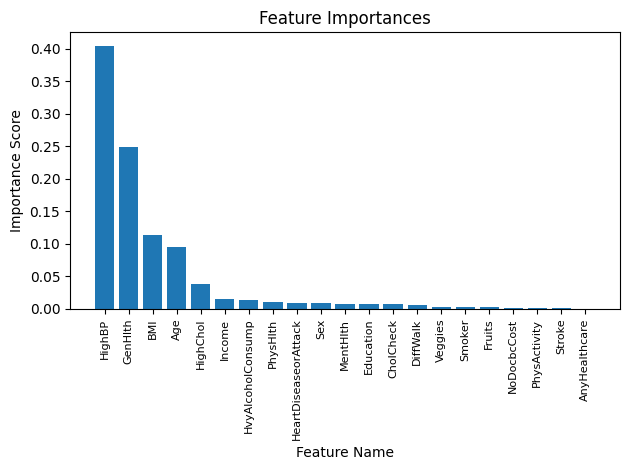

In [163]:
fnames = model4.feature_names_in_
importance = model4.feature_importances_
dfdata = pd.DataFrame({'feature': fnames, 'importance': importance})
sorted = dfdata.sort_values(by='importance',ascending=False)


plt.title("Feature Importances")
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.bar(sorted['feature'],sorted['importance'])
plt.xticks(rotation=90,size=8)
plt.tight_layout()

The most important variables here were:
- HighBP
- GenHlth
- BMI
- Age
- HighChol

Testing What Variables Random Forest Would Select

In [20]:
from sklearn.ensemble import RandomForestClassifier

def imp_features(iv_train, iv_test, dv_train, dv_test):
    rf = RandomForestClassifier(n_estimators = 500, random_state = 42)
    rf_f=rf.fit(iv_train, dv_train)
    return rf_f

In [21]:
rf_original_if= imp_features(train_Ivs1, test_Ivs1, train_DV1, test_DV1)
fnames=rf_original_if.feature_names_in_
importance =rf_original_if.feature_importances_

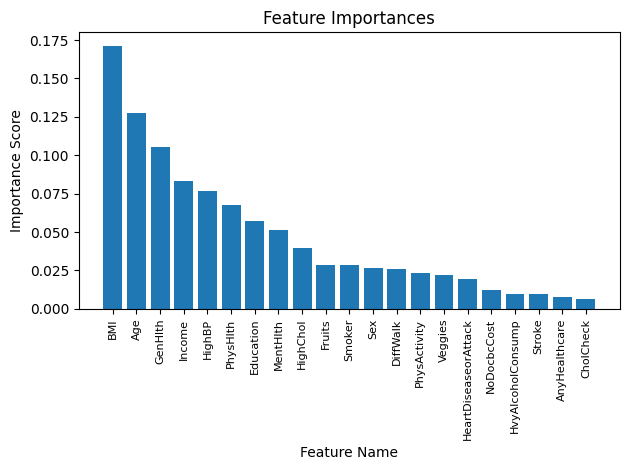

In [22]:
#visualizing

dfdata = pd.DataFrame({'feature': fnames, 'importance': importance})
sorted = dfdata.sort_values(by='importance',ascending=False)

plt.title("Feature Importances")
plt.xlabel("Feature Name")
plt.ylabel("Importance Score")
plt.bar(sorted['feature'],sorted['importance'])
plt.xticks(rotation=90,size=8)
plt.tight_layout()

The most important variables here were:
- BMI
- Age
- GenHlth
- Income
- HighBP

Based on the correlation from EDA the features moving with the variable the most are:
- GenHlth
- HighBP
- BMI
- HighChol
- Age 
- DiffWalk

With a decision boundry of 0.21.

For the modelling process four datasets will be used:

- Original dataset: chosen as the dataset might be originally preprocessed, since no additional feature engineering seem to have significant impact.

- Important Dataset: 'Diabetes_binary','HighBP','GenHlth','BMI','Age','HighChol' , with important variables identified through classification trees.

- Important RF Dataset: 'Diabetes_binary','HighBP','GenHlth','BMI','Age','Income' , with important variables identified through classification trees.

- Currated Dataset: The gaps in literature indicate that there is a need to identify behavioral factors contributing to type 2 diabetes. The dataset will include minimized dataset + 'Smoker', 'DiffWalk' variables. PhysActivity is not included due to negative correlation to the target.

In [25]:
# diabetes_important=diabetes[['Diabetes_binary','HighBP','GenHlth','BMI','Age','HighChol']]
# currated_dataset =diabetes[['Diabetes_binary','HighBP','GenHlth','BMI','Age','HighChol','Smoker','DiffWalk']]
# diabetes_important_rf =diabetes[['Diabetes_binary','HighBP','GenHlth','BMI','Age','Income']]

# diabetes_important.to_csv('diabetes_important.csv',index=False)
# currated_dataset.to_csv('currated_dataset.csv',index=False)
# diabetes_important_rf.to_csv('diabetes_important_rf.csv',index=False)